<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #11: Análisis de sentimiento
### Estudiante: Ilvar dario Sanabria
### Código      : 616201058
`Fecha de entrega: Noviembre 21, 2020 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [10]:
### Importamos las librerias
import pandas as pd
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [2]:
# Leer las Claves para acceder al api de twiter
keys = pd.read_csv("c:/tmp/KeysAPI_twiter.txt", header=None)
keys = dict(zip(keys[0],keys[1]))

In [3]:
# Solicitar el acceso a través API

auth = tweepy.OAuthHandler(keys['api_key'], keys['api_secret_key'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])

api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
# Leemos las coord de ciudades desde un archivo

ciudades = pd.read_csv("c:/tmp/co_small.csv")
ciudades.head()

city        lat        lng   country iso2            admin  \
0        Bogotá   4.649178 -74.062827  Colombia   CO           Bogotá   
1      Medellín   6.251840 -75.563591  Colombia   CO        Antioquia   
2          Cali   3.437222 -76.522500  Colombia   CO  Valle del Cauca   
3  Barranquilla  10.963889 -74.796389  Colombia   CO        Atlántico   
4   Bucaramanga   7.125393 -73.119804  Colombia   CO        Santander   

   capital  population  population_proper  
0  primary   7772000.0          6333661.0  
1    admin   3297000.0          1999979.0  
2    admin   2254000.0          2178836.0  
3    admin   1798000.0          1244491.0  
4    admin   1009000.0           571820.0

In [5]:
# Recolectamos los datos relacionados con la palabra #selección# (por el partido de futbol !)
all_tweets = []

for ciudad in ciudades.iterrows() :
    c = ciudad[1]
    gc = f"{c.lat},{c.lng},70km"
    c_name = c.city
      
    tweets = tweepy.Cursor(api.search,
                        q=['selección -RT'],
                        lang='es',
                        geocode=gc,
                        tweet_mode='extended',
                        include_rts=False).items(20)


    t = []
 
    for tweet in tweets:
        temp = []
        temp.append(tweet.full_text)
        temp.append(tweet.created_at)
        temp.append(c_name)
        temp.append(tweet.user.location)
        temp.append(tweet.id)
        temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
 
        t.append(temp)
    
    all_tweets.extend(t)
    print(c_name)
    

Bogotá
Medellín
Cali
Barranquilla
Bucaramanga
Cartagena
Cúcuta
Pereira
Santa Marta
Ibagué
Pasto
Manizales
Villavicencio
Neiva
Armenia
Valledupar
Montería
Sincelejo
Popayán
Tunja
Ríohacha
Florencia
Quibdó
Arauca
Yopal
Leticia
San Andrés
San José del Guaviare
Mocoa
Puerto Carreño
Mitú
Inírida


In [32]:
#Creamos un dataFrame con los datos recolectados
datos_tw = pd.DataFrame(all_tweets)
datos_tw.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']

datos_tw.head()

tweet                date  \
0  @ricardoumbacia @orduzrubio @ESPNColombia Le h... 2020-11-19 00:20:08   
1  @pulzo @LaLuciernaga @CaracolRadio James ahora... 2020-11-19 00:20:07   
2  @mtrianv @Diego_Mpe @pilarvelasquezv Y Queiroz... 2020-11-19 00:19:38   
3  @eldoctorpelaez Con tal de sacar el técnico, n... 2020-11-19 00:19:04   
4  @SergioUrbina19 De acuerdo. Pero ojo: tampoco ... 2020-11-19 00:18:44   

     city       user_location                   id  \
0  Bogotá     Bogota COLOMBIA  1329217862842638347   
1  Bogotá              Bogota  1329217858463797249   
2  Bogotá    Bogotá, Colombia  1329217733737803790   
3  Bogotá             Bogotá   1329217593241194507   
4  Bogotá  Bogotá - Cartagena  1329217508365262853   

                                                link  
0  https://twitter.com/i/web/status/1329217862842...  
1  https://twitter.com/i/web/status/1329217858463...  
2  https://twitter.com/i/web/status/1329217733737...  
3  https://twitter.com/i/web/status/1329217593241...  
4  https://twitter.com/i/web/status/1329217508365...

In [33]:
#Se define la funcion de limpieza de datos
import re
 
pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'
 
def text_clean(row):    
    text = row['tweet']
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]

    for link in links:
        text = text.replace(link,"")

    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]

    for hashtag in hashtags:
         text = text.replace(hashtag,"")

    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]

    for mention in mentions:
         text = text.replace(mention,"")

    return text, links, hashtags, mentions

In [34]:
datos_tw[['tweet_cl', 'links', 'hashtags', 'mentions']] = datos_tw.apply(text_clean, axis=1, result_type='expand')

datos_tw.head()

tweet                date  \
0  @ricardoumbacia @orduzrubio @ESPNColombia Le h... 2020-11-19 00:20:08   
1  @pulzo @LaLuciernaga @CaracolRadio James ahora... 2020-11-19 00:20:07   
2  @mtrianv @Diego_Mpe @pilarvelasquezv Y Queiroz... 2020-11-19 00:19:38   
3  @eldoctorpelaez Con tal de sacar el técnico, n... 2020-11-19 00:19:04   
4  @SergioUrbina19 De acuerdo. Pero ojo: tampoco ... 2020-11-19 00:18:44   

     city       user_location                   id  \
0  Bogotá     Bogota COLOMBIA  1329217862842638347   
1  Bogotá              Bogota  1329217858463797249   
2  Bogotá    Bogotá, Colombia  1329217733737803790   
3  Bogotá             Bogotá   1329217593241194507   
4  Bogotá  Bogotá - Cartagena  1329217508365262853   

                                                link  \
0  https://twitter.com/i/web/status/1329217862842...   
1  https://twitter.com/i/web/status/1329217858463...   
2  https://twitter.com/i/web/status/1329217733737...   
3  https://twitter.com/i/web/status/1329217593241...   
4  https://twitter.com/i/web/status/1329217508365...   

                                            tweet_cl links hashtags  \
0     Le ha faltado suerte y equipo! Chile está e...    []       []   
1             James ahora va a tirarse la selección!    []       []   
2     Y Queiroz que ganó?\nSabía ud q ese señor f...    []       []   
3   Con tal de sacar el técnico, no les importa l...    []       []   
4   De acuerdo. Pero ojo: tampoco trayendo un DT ...    []       []   

                                        mentions  
0  [@ricardoumbacia, @orduzrubio, @ESPNColombia]  
1         [@pulzo, @LaLuciernaga, @CaracolRadio]  
2       [@mtrianv, @Diego_Mpe, @pilarvelasquezv]  
3                              [@eldoctorpelaez]  
4                              [@SergioUrbina19]

#### Asignamos el puntaje al tweet limpio, y lo guardamos en una columna 'puntaje'

In [36]:
datos_tw['puntaje']=datos_tw['tweet_cl'].apply(lambda x: vader.polarity_scores(x)['compound'])
datos_tw[['tweet_cl','puntaje']]

tweet_cl  puntaje
0       Le ha faltado suerte y equipo! Chile está e...   0.5526
1               James ahora va a tirarse la selección!   0.0000
2       Y Queiroz que ganó?\nSabía ud q ese señor f...   0.0000
3     Con tal de sacar el técnico, no les importa l...  -0.4184
4     De acuerdo. Pero ojo: tampoco trayendo un DT ...   0.0000
..                                                 ...      ...
557  Los colombianos son más hinchas de su selecció...   0.0000
558  Como amo a esta selección  de niño, ahora de a...   0.0000
559  Brasil entrena con cinco jugadores y Neymar en...   0.0000
560       Merecido, que buena selección tiene ecuador    0.0000
561  🤣🤣🤣 que saquen a Queiroz. Carlos Antonio Velez...   0.8625

[562 rows x 2 columns]

###  `[10 pts]` Punto 2: ¿Cuál es el tuit más positivo y más negativo?

In [53]:
datos_tw[['tweet_cl','puntaje']].max()

tweet_cl    🥳 ⚽ ¡El Fenómeno del Fútbol vuelve con los par...
puntaje                                                0.9837
dtype: object

In [54]:
datos_tw[['tweet_cl','puntaje']].min()

tweet_cl    \n\nMina no está a nivel de selección.\nMojica...
puntaje                                                -0.923
dtype: object

###  `[15 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [81]:
positivos = 0
negativos = 0
neutros   = 0
for tw in datos_tw[['puntaje']].values:
    if tw > 0 :
        positivos=positivos +1
    elif tw < 0 : 
        negativos=negativos+1
    else :
        neutros = neutros +1
        
print("Tweets Positivos: {}".format(positivos))
print("Tweets Negativos: {}".format(negativos))
print("Tweets Neutros: {}".format(neutros))

Tweets Positivos: 55
Tweets Negativos: 197
Tweets Neutros: 310


###  `[BONUS 5pts]` : Diagrama de barras de la pregunta 3


In [84]:
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [85]:
tweet_sent = pd.DataFrame({'Sentimiento': ['Positivos', 'Negativos' , 'Neutros'], 'Cantidad': [positivos,negativos, neutros]})

In [86]:
trace = go.Bar(x=tweet_sent.Sentimiento.values[:5],
                y=tweet_sent.Cantidad.values[:5])
 
layout = go.Layout(title='Cantidad de Tweets por Sentimiento')
 
fig = go.Figure(data=[trace], layout=layout)

iplot(fig)


###  `[BONUS 7pts]` : Nubes de palabras por sentimiento

In [93]:
# Importamos las librerias
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords

stopwords = stopwords.words('spanish')

In [96]:
idx_positivos = datos_tw.loc[:, 'puntaje'] > 0
idx_negativos = datos_tw.loc[:, 'puntaje'] < 0
idx_neutros = datos_tw.loc[:, 'puntaje'] == 0

df_positivos = datos_tw.loc[idx_positivos]
df_negativos = datos_tw.loc[idx_negativos]
df_neutros = datos_tw.loc[idx_neutros]


#### Nube de palabras de sentimientos Positivos

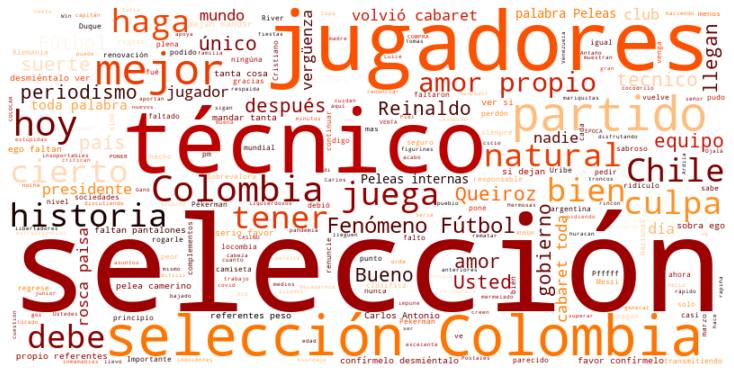

In [97]:
palabras=df_positivos.tweet_cl.str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400,                
                      max_font_size=150, max_words=250,
                      background_color='white', colormap='gist_heat',
                      stopwords=stopwords).generate(palabras)
 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

#### Nube de palabras de sentimientos Negativos

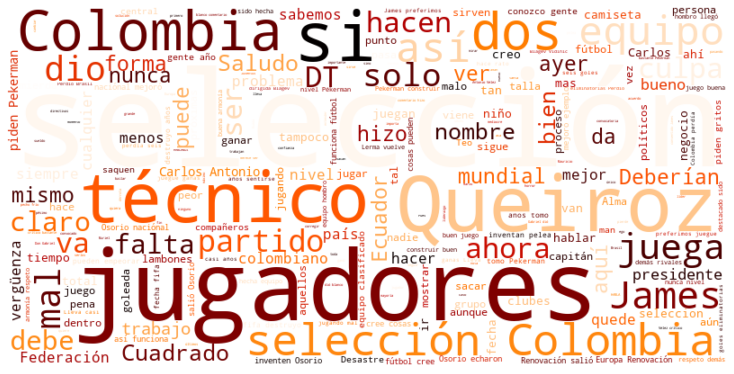

In [99]:
palabras=df_negativos.tweet_cl.str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400,                
                      max_font_size=150, max_words=250,
                      background_color='white', colormap='gist_heat',
                      stopwords=stopwords).generate(palabras) 
 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

#### Nube de palabras de sentimientos Neutros

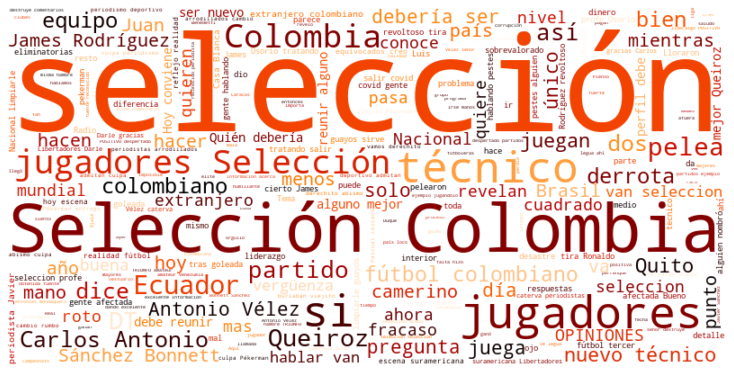

In [100]:
palabras=df_neutros.tweet_cl.str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400,                
                      max_font_size=150, max_words=250,
                      background_color='white', colormap='gist_heat',
                      stopwords=stopwords).generate(palabras) 
 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()